# Dataset background information

Boston Housing dataset:

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. There are 506 samples and 13 feature variables in this data-set. 

## Data-dictionary
The description of all the features is given below:
- CRIM - per capita crime rate by town 
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS - proportion of non-retail business acres per town.

- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \\$10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in \\$1000's

# Objective of analysis
The objective is to predict the value of prices of the house using the given features.

In [1]:
# Import Libraries needed to load the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns 
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
# Load the data from sklearn module
df = pd.DataFrame(load_boston().data,columns=load_boston().feature_names)
df['MEDV'] = pd.DataFrame(load_boston().target)

# Glimpse the dataset
print(df.head(),"\n")
print('Shape of Data is : {} rows and {} columns'.format(df.shape[0],df.shape[1]))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2   

Shape of Data is : 506 rows and 14 columns


# Table of contents for analysis

In this analysis, we will first conduct 

    1. EDA (Exploratory data analyssis)
    2. Feature engineeering
    3. train-test split
    4. simple linear regresssion  
    5. polynomial regression
    6. regularization regression (with grid search for hyper-parameter tuning)
    7. model evaluation & comparision

## EDA (Exploratory data analyssis)

In [3]:
print(df.describe(),'\n')
print(df.info())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

- for ZA, its 0.00 for 25%,50% percentiles, while the mean is 11.3 which implied that the distribution should be highly skewed. 
- for CHAS, its 0.00 for 25%,50%,75% percentiles, & max is 1.00 , implied that its a categorical value with 1/0 value.

In [4]:
# check for missing values in all the columns
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Feature engineering (for target variable - MEDV)

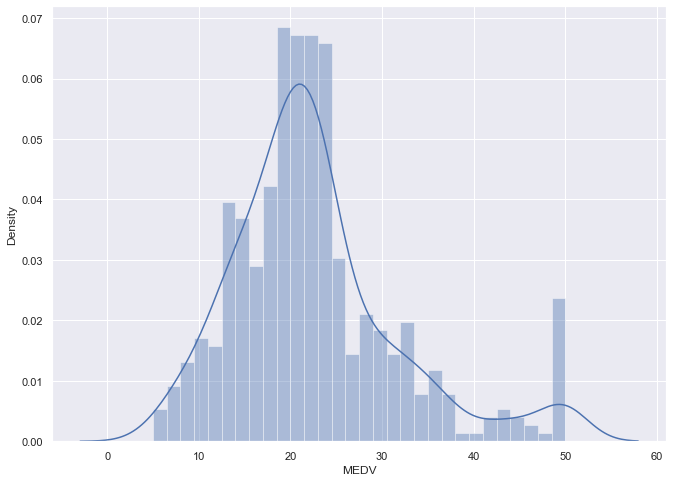

In [5]:
# Visualize the dataset
sns.set(rc={'figure.figsize':(11,8)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

Linear Regression assumes a normally distributed residuals

In [6]:
# Teseting for normality
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
normaltest(df.MEDV.values)

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20)

p-value _extremely_ low (i.e. p-value=1.7e-20). Our y variable we've been dealing with this whole time was not normally distributed!

* __D'Agostino K^2 Test__ is a statistical test that tests whether a distribution is normally distributed or not. It isn't perfect, but suffice it to say: 
    * This test outputs a "p-value". The _higher_ this p-value is the _closer_ the distribution is to normal.
    * Frequentist statisticians would say that you accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.
    


Generally, the target variable (MEDV) distributed normally. However,there are only few outliers in the tail (i.e. MEDV = 50). 

The max value of MEDV is 50 which I assume those MEDV >50 will adjust as 50 in this dataset. For better prediction, I will drop the records with MEDV >=50

In [7]:
df = df[df['MEDV']<50]
print(df.shape) 

# Teseting for normality
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
normaltest(df.MEDV.values)

(490, 14)


NormaltestResult(statistic=51.788750978806746, pvalue=5.678264421954442e-12)

The p-value improved (i.e. p-value=5.6e-12). However, still a long way to be in acceptable level (i.e. p-value > 0.05")

Therefore, we can apply transformation and geet it to be normally distributed:

* Box cox transformation

The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

It is defined as:

$$ \text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda} $$

You can think of as a generalization of the square root function: the square root function uses the exponent of 0.5, but box cox lets its exponent vary so it can find the best one.

In [8]:
from scipy.stats import boxcox
bc_result = boxcox(df.MEDV)
boxcox_medv = bc_result[0]
lam = bc_result[1] # lambda value

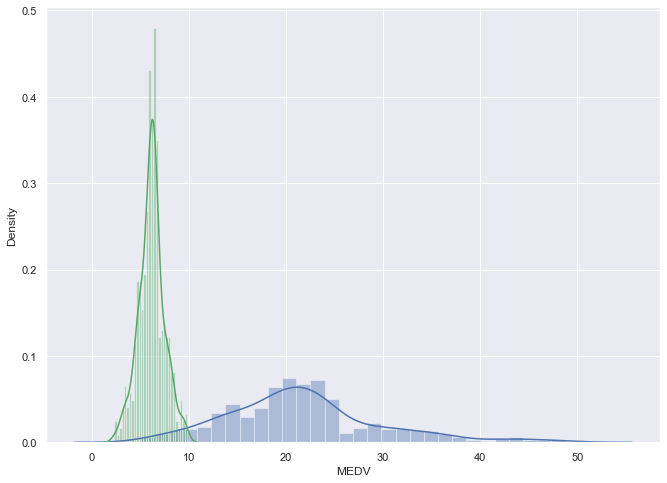

NormaltestResult(statistic=3.208799390351443, pvalue=0.2010101860833068)


In [9]:
sns.set(rc={'figure.figsize':(11,8)})
sns.distplot(df['MEDV'], bins=30) # old plot in blue
sns.distplot(boxcox_medv, bins=30,  color="g") # new plot in green
plt.show()

print(normaltest(boxcox_medv))

we can see that the new plot in green is more & more normally distributed. 

Also, the p-value is 0.20 which is >0.05, means that null hypothesis will not be rejected.

## train-test split

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

lr = LinearRegression()
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=19)

## Simple linear regresssion  

for simple demostration of regression, we will skip k-fold cross-validation, instead, just a simple 8:2 train-test split.

In [11]:
lr = LinearRegression()
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=19)

As the feature variables are in "float" datatype but in different scale, we will apply standard scaler to all the features

In [12]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)

Also, we will do the box-cox transformation

In [13]:
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

In [14]:
lr.fit(X_train_s, y_train_bc)
y_pred_bc = lr.predict(X_test_s)

# Inverse transform back to normal status (not the box-cox state)
from scipy.special import inv_boxcox
y_pred_tran = inv_boxcox(y_pred_bc, lam2)

### model evaluation metrics

For regression, we will use RMSE & R^2. But for models comparison with different number of features, we will use adjusted R^2 instead as the number of features variate.

RMSE (root-mean-squared-error): penalizes more on the high-deviated error (far from the regression line)

R^2 (R-squared): tells the performance of your model, not the loss in an absolute sense that how many wells did your model perform.

In [15]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MSE_simple = mean_squared_error(y_test,y_pred_tran)
r2_simple = r2_score(y_test,y_pred_tran)

print("MSE",mean_squared_error(y_test,y_pred_tran))
print("R2",r2_score(y_test,y_pred_tran))

Adj_r2 = 1 - (1-r2_score(y_test, y_pred_tran)) * (len(y)-1)/(len(y)-X.shape[1]-1)
print("adj_R2",Adj_r2)


MSE 13.825142905821151
R2 0.7788249103970966
adj_R2 0.7727844142524795


In sciki-learn, it doesn't include such function. So, for feature selection, after standard scaling, we choose features based on its absolute amount of coefficient. The larger the coefficient, the larger the impact on the target.

In R programming, the "lm" regression syntax can generate p-value as well for each feature so we can decide its statistical significance level, in order to have better feature selection. 

In [16]:
# showing top 10 features having highest absolute coefficient value
pd.DataFrame(zip(X_train.columns, lr.coef_, abs(lr.coef_))).sort_values(by=2, ascending=False) 


,0,1,2
12,LSTAT,-0.615821,0.615821
9,TAX,-0.441434,0.441434
8,RAD,0.435455,0.435455
7,DIS,-0.431481,0.431481
5,RM,0.319416,0.319416
10,PTRATIO,-0.298962,0.298962
4,NOX,-0.294490,0.294490
0,CRIM,-0.259776,0.259776
11,B,0.130513,0.130513
1,ZN,0.128100,0.128100


The top 5 features includes LSTAT, TAX, RAD, DIS, RM

## Polynomial regression

In [17]:
from sklearn.preprocessing import PolynomialFeatures

### Create polynomial features

In [18]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf_train = pf.fit_transform(X_train)
X_pf_test = pf.transform(X_test)

In [19]:
# list of polynomial features column names
X_pf_col_name = pf.get_feature_names(X_train.columns)

In [20]:
# standard scaler on the ploynomial features
X_pf_train_s = s.fit_transform(X_pf_train)
X_pf_test_s = s.transform(X_pf_test)

In [21]:
# we create a new linear regression instances for polynomial regress
lr_pf = LinearRegression()
lr_pf.fit(X_pf_train_s, y_train_bc)
y_pf_pred_bc = lr_pf.predict(X_pf_test_s)

# Inverse transform back to normal status (not the box-cox state)
from scipy.special import inv_boxcox
y_pf_pred_tran = inv_boxcox(y_pf_pred_bc, lam2)

In [22]:
MSE_simple = mean_squared_error(y_test,y_pf_pred_tran)
r2_simple = r2_score(y_test,y_pf_pred_tran)

print("MSE",mean_squared_error(y_test,y_pf_pred_tran))
print("R2",r2_score(y_test,y_pf_pred_tran))

Adj_r2 = 1 - (1-r2_score(y_test, y_pf_pred_tran)) * (len(y)-1)/(len(y)-X.shape[1]-1)
print("adj_R2",Adj_r2)

MSE 10.258289520900945
R2 0.8358875478240106
adj_R2 0.8314054850544983


The MSE & R-squared & adjusted R-squared improved after adding polynomial featuers.

In [23]:
# showing top 10 features having highest absolute coefficient value
pd.DataFrame(zip(X_pf_col_name, lr_pf.coef_, abs(lr_pf.coef_))).sort_values(by=2, ascending=False)[:10] 


,0,1,2
0,CRIM,-12.020087,12.020087
22,CRIM TAX,10.910273,10.910273
21,CRIM RAD,-8.154742,8.154742
95,TAX PTRATIO,6.354623,6.354623
23,CRIM PTRATIO,5.716689,5.716689
9,TAX,-5.126624,5.126624
90,RAD TAX,4.983564,4.983564
8,RAD,4.855731,4.855731
89,RAD^2,-4.545919,4.545919
2,INDUS,-3.792526,3.792526


To recap:
Simple LR: The top 5 features includes LSTAT, TAX, RAD, DIS, RM

By above analysis:
Polynomial LR: The top 5 features includes CRIM, TAX, RAD, PTRATIO

Those are in-common are: TAX, RAD

## Regularization regression (with grid search for hyper-parameter tuning)

For demostration, we will perform lasso regression as it has the same syntax of ridge regression in terms of regression & grid search for hyperparameter tuning

In [24]:
from sklearn.linear_model import Lasso

las = Lasso()
las.fit(X_pf_train_s, y_train_bc)
print(las.coef_ )

[-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.         -0.          0.
 -0.         -0.          0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.
 -0.         -0.          0.         -0.         -0.         -0.
  0.         -0.          0.         -0.          0.         -0.
 -0.          0.          0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.          0.          0.          0.         -0.         -0.
 -0.         -0.         

For Lasso regression, with more regularization (higher alpha) we will expect the penalty for higher weights to be greater and thus the coefficients to be pushed down. Thus a higher alpha means lower magnitude with more coefficients pushed down to 0.

As the default hyperparameter-alpha (Constant that multiplies the L1 term) for lasso regression is 1.0, which heavily peanlize the coefficient which makes 95% of them becoming 0.

Now, we have to find the optimum alpha which improves the model by tuning the alpha (hyper-parameter tuning with grid-search)

In [25]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [26]:
lasso_params = {'alpha':[0.0001,0.001,0.01, 0.1, 0.5]}

In [27]:
GridSearchCV(Lasso(),param_grid=lasso_params).fit(X_pf_train_s, y_train_bc).best_estimator_

Lasso(alpha=0.001)

after getting alpha = 0.001 for best estimator alpha, we try to test more values between 0.0001 & 0.01

In [28]:
lasso_params = {'alpha':[0.0001,0.0005,0.001, 0.0015, 0.002]}

In [29]:
GridSearchCV(Lasso(),param_grid=lasso_params).fit(X_pf_train_s, y_train_bc).best_estimator_

Lasso(alpha=0.0015)

the best alpha value has been updated to 0.0015. we will use this value as our lasso regression alpha

In [31]:
# Decreasing regularization and ensuring convergence
las0015 = Lasso(alpha = 0.0015, max_iter=100000)
las0015.fit(X_pf_train_s, y_train_bc)
print(las0015.coef_ )

[ 0.         -0.          0.          0.          0.         -0.
  0.22384555 -1.04760158  0.11058241  0.         -0.          0.
  0.21695849  0.27491106  0.          0.14647868  0.14561214 -0.82078535
  0.14496791  0.          0.          0.          0.          0.
 -0.09402768 -0.01282649  0.03086525 -0.07467588 -0.0328493  -0.
  0.         -0.         -0.         -0.11270789  0.12562697  0.08211767
 -0.         -0.02131139  0.15487656 -0.          0.19805288 -0.
  0.09076574 -0.          0.          0.         -0.09679857 -0.
 -0.51714178  0.         -0.13586882 -0.30711426  0.          0.39337973
 -0.15700139 -0.         -0.          0.0486579   0.07768891  0.
 -0.22867049 -0.         -0.          0.          0.         -0.33188105
  0.44857236 -0.          1.17900857 -0.          0.         -0.19782117
 -1.30664979 -0.39613501  0.56683864 -0.48941698  0.          0.08280607
  0.34354294  0.         -0.         -0.71872461 -0.03760432  0.42972613
  0.33059085 -0.05062658  0.      

In [32]:
# showing top 10 features having highest absolute coefficient value
pd.DataFrame(zip(X_pf_col_name, las0015.coef_, abs(las0015.coef_))).sort_values(by=2, ascending=False)[:10] 

,0,1,2
95,TAX PTRATIO,1.541951,1.541951
72,RM TAX,-1.306650,1.306650
68,RM^2,1.179009,1.179009
7,DIS,-1.047602,1.047602
17,CRIM NOX,-0.820785,0.820785
97,TAX LSTAT,-0.785497,0.785497
81,AGE B,-0.718725,0.718725
103,LSTAT^2,0.627108,0.627108
74,RM B,0.566839,0.566839
48,INDUS LSTAT,-0.517142,0.517142


To recap:
Simple LR: The top 5 features includes LSTAT, TAX, RAD, DIS, RM
Polynomial LR: The top 5 features includes CRIM, TAX, RAD, PTRATIO

By above analysis:
Lasso LR: The top 5 features includes TAX, PTRATIO, RM, CRIM, NOX, DIS

Those are in-common are: TAX, PTRATIO, RM, CRIM, DIS

Based on above models, we can conclude that, Boston housing value below $50000 (MEDV) are mostly affected by
tax rate, education (PTRATIO), size (RM), safetyness, & ease to going work.

Data-dictionary recap:
- TAX - full-value property-tax rate per \\$10,000
- PTRATIO - pupil-teacher ratio by town
- RM - average number of rooms per dwelling
- CRIM - per capita crime rate by town 
- DIS - weighted distances to five Boston employment centres

## model evaluation & comparision

In [33]:
# Finding prediction on test set
y_las_pred_bc = las0015.predict(X_pf_test_s)

In [34]:
# Inverse transform back to normal status (not the box-cox state)
from scipy.special import inv_boxcox
y_las_pred_tran = inv_boxcox(y_las_pred_bc, lam2)

In [35]:
MSE_simple = mean_squared_error(y_test,y_las_pred_tran)
r2_simple = r2_score(y_test,y_las_pred_tran)

print("MSE",mean_squared_error(y_test,y_las_pred_tran))
print("R2",r2_score(y_test,y_las_pred_tran))

Adj_r2 = 1 - (1-r2_score(y_test, y_las_pred_tran)) * (len(y)-1)/(len(y)-X.shape[1]-1)
print("adj_R2",Adj_r2)

MSE 8.551564803252571
R2 0.8631917858289884
adj_R2 0.8594554270386037


To recap:
simple linear regression:
MSE 13.825142905821151
R2 0.7788249103970966
adj_R2 0.7727844142524795

polynomial regression:
MSE 10.258289520900945
R2 0.8358875478240106
adj_R2 0.8314054850544983

lasso regression:
MSE 8.551564803252571
R2 0.8631917858289884
adj_R2 0.8594554270386037

Lasso regression with hyperparameter tuning has showing a great improve on polynomial regression in terms of MSE & R2 & adj-R2.
i.e. smallest MSE, highest R2 & adj-R2

Therefore, we should choose lasso regression model with alpha = 0.015. 

# Suggested-action for extra-mile

We comes to an end for this analysis. However, there are always an extra mile for every analysis. On top of above analysis, investigator can build stepwise regression model & evaluated by MSE & R^2 to select the original features to further optimize the algorithm. 

Also, implementing K-fold cross-validation can take the average mean of evaluation metrics with more random splitting so to get a more general observations.